<a href="https://colab.research.google.com/github/PawinData/UC/blob/master/DataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import str_to_day

In [20]:
df = pd.read_csv('https://query.data.world/s/7ifvvpyy23sa2fciuvcygehakxlnnv')

# only look at California
df = df.loc[df["state"]=="California"]

# explore counties in California

count = dict()              # how many data instances in each county
for cnty in df["county"]:
    count[cnty] = count.get(cnty,0) + 1

sum = 0                    # count the number of counties in California
t = list(count.items())
t.sort()
for tp in t:
    print(tp)
    sum += 1
print("There are "+str(sum)+" counties in the dataset.")

print("California has 58 counties in total.")

('Alameda', 40)
('Alpine', 11)
('Amador', 21)
('Butte', 20)
('Calaveras', 17)
('Colusa', 14)
('Contra Costa', 38)
('Del Norte', 8)
('El Dorado', 20)
('Fresno', 34)
('Glenn', 13)
('Humboldt', 50)
('Imperial', 21)
('Inyo', 16)
('Kern', 24)
('Kings', 14)
('Lake', 4)
('Los Angeles', 75)
('Madera', 34)
('Marin', 44)
('Mendocino', 23)
('Merced', 17)
('Mono', 17)
('Monterey', 24)
('Napa', 44)
('Nevada', 25)
('Orange', 76)
('Placer', 39)
('Plumas', 10)
('Riverside', 34)
('Sacramento', 49)
('San Benito', 28)
('San Bernardino', 26)
('San Diego', 60)
('San Francisco', 68)
('San Joaquin', 31)
('San Luis Obispo', 27)
('San Mateo', 39)
('Santa Barbara', 26)
('Santa Clara', 70)
('Santa Cruz', 34)
('Shasta', 32)
('Siskiyou', 20)
('Solano', 46)
('Sonoma', 44)
('Stanislaus', 30)
('Sutter', 16)
('Tehama', 7)
('Tulare', 29)
('Tuolumne', 12)
('Unknown', 12)
('Ventura', 31)
('Yolo', 35)
('Yuba', 20)
There are 54 counties in the dataset.
California has 58 counties in total.


In [48]:
# only look at the 10 counties in LA-centered South California
COUNTIES = ['San Luis Obispo', 'Kern', 'San Bernardino', 'Santa Barbara', 'Ventura', 
            'Los Angeles', 'Orange', 'Riverside', 'San Diego', 'Imperial']
COUNTIES.sort()

DATA = pd.DataFrame(df.loc[df['county']==COUNTIES[0]], index=None)
for cnty in COUNTIES[1:]:
    DATA = DATA.append(df.loc[df["county"]==cnty], ignore_index=True)
        
print(DATA.shape)
DATA 

(400, 6)


,date,county,state,fips,cases,deaths
0,2020-03-20,Imperial,California,6025.0,4,0
1,2020-03-21,Imperial,California,6025.0,4,0
2,2020-03-22,Imperial,California,6025.0,4,0
3,2020-03-23,Imperial,California,6025.0,4,0
4,2020-03-24,Imperial,California,6025.0,9,0
...,...,...,...,...,...,...
395,2020-04-05,Ventura,California,6111.0,221,6
396,2020-04-06,Ventura,California,6111.0,226,6
397,2020-04-07,Ventura,California,6111.0,243,6
398,2020-04-08,Ventura,California,6111.0,263,7


In [0]:
# save the dataframe
DATA.to_csv (r'Data_cleaned.csv', index=False, header=True) 

In [54]:
# find the time window of observation
t = list(DATA["date"])
t.sort()
print("The start of observation:", t[0])
print("The end of observation:", t[-1])

The start of observation: 2020-01-25
The end of observation: 2020-04-09


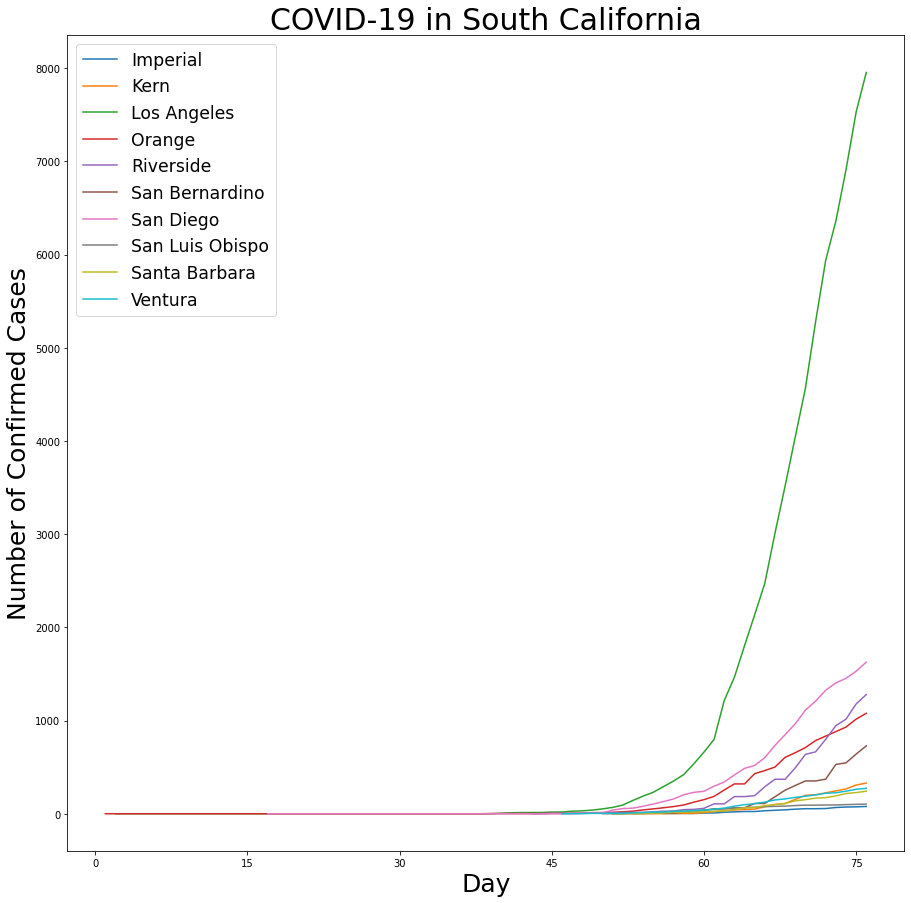

In [90]:
# plot the dynamics of confirmed cases for each county
plt.figure(figsize=(15,15))
for cnty in COUNTIES:
    data = DATA.loc[DATA["county"]==cnty]
    plt.plot([str_to_day(D) for D in data["date"]], data["cases"])
plt.xticks(np.arange(0,76, step=15))
plt.title("COVID-19 in South California", fontsize=30)
plt.xlabel("Day", fontsize=25)
plt.ylabel("Number of Confirmed Cases", fontsize=25)
plt.legend(COUNTIES, loc="upper left", fontsize="xx-large")
plt.show()

# The results make sense intuitively. While the pandemic grows fastest in Los Angeles, Imperial and San Luis Obispo, two counties most distant to Los Angeles, have fewest confirmed cases of COVID-19. The presence of temporal-spatial correlations is very likely.